In [119]:
# stock price prediction using RNNs


# Develop and compare different RNNs architecture for predicing stock prices
## test cases for standard RNN, LSTM , GRU
#evaluate model on accuracy , RMSE, and performance on sequential data




Stock data will be obtain from kaggle https://www.kaggle.com/datasets/paultimothymooney/stock-market-data

In [120]:
#import some package
import numpy as np
import pandas as pd


In [121]:
# Collecting data
# load data from csv file
data = pd.read_csv("A.csv")
print("data")
print(data.head()) # show some data

data
         Date        Low       Open    Volume       High      Close  \
0  18-11-1999  28.612303  32.546494  62546380  35.765381  31.473534   
1  19-11-1999  28.478184  30.713518  15234146  30.758226  28.880545   
2  22-11-1999  28.657009  29.551144   6577870  31.473534  31.473534   
3  23-11-1999  28.612303  30.400572   5975611  31.205294  28.612303   
4  24-11-1999  28.612303  28.701717   4843231  29.998213  29.372318   

   Adjusted Close  
0       27.066582  
1       24.836662  
2       27.066582  
3       24.605980  
4       25.259573  


# Preprocessing Data

In [122]:
#handle missing values
data = data.fillna(method='ffill')

/tmp/ipykernel_341096/3012038085.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [123]:
#feature selection
#select close for prediction
data = data[['Close']]

In [124]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
normalized_data = scaler.fit_transform(data)

In [125]:
#sequential data conversion for RNN
X, y = [], []
sequence_length = 60
for i in range(sequence_length, len(normalized_data)):
    X.append(normalized_data[i-sequence_length:i, 0])
    y.append(normalized_data[i, 0])
    

In [126]:
X, y = np.array(X), np.array(y)
X = np.expand_dims(X, axis=-1) 

In [127]:
#split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
print(f"training data shape {X_train.shape}")
print(f"testing data shape {X_test.shape}")


training data shape (4595, 60, 1)
testing data shape (1149, 60, 1)


# General function for processing data and plot

In [128]:
# function to preprocess data
def preprocessing(path, sequence_length=60):
    data = pd.read_csv(path)
    print("data")
    print(data.head()) # show some data
    # preprocessing
    data = data.fillna(method='ffill')
    # feature selection 
    data = data[['Close']]
    # normalize 
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_data = scaler.fit_transform(data)
    # sequnce for RNN
    X, y = [], []
    #sequence_length = 60
    for i in range(sequence_length, len(normalized_data)):
        X.append(normalized_data[i-sequence_length:i, 0])
        y.append(normalized_data[i, 0])
    X, y = np.array(X), np.array(y)
    X = np.expand_dims(X, axis=-1) # add dimention for RNN input
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)
    print(f"training data shape {X_train.shape}")
    print(f"testing data shape {X_test.shape}")
    return X_train, X_test, y_train, y_test, scaler

    
# function to plot result
import matplotlib.pyplot as plt
def plot_predictions(y_true, y_pred, title="Stock Price Prediction"):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true, label="True Prices")
    plt.plot(y_pred, label="Predicted Prices")
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()
file_path="A.csv"
sequence_length=60
X_train, X_test, y_train, y_test, scaler  = preprocessing(file_path, sequence_length)

data
         Date        Low       Open    Volume       High      Close  \
0  18-11-1999  28.612303  32.546494  62546380  35.765381  31.473534   
1  19-11-1999  28.478184  30.713518  15234146  30.758226  28.880545   
2  22-11-1999  28.657009  29.551144   6577870  31.473534  31.473534   
3  23-11-1999  28.612303  30.400572   5975611  31.205294  28.612303   
4  24-11-1999  28.612303  28.701717   4843231  29.998213  29.372318   

   Adjusted Close  
0       27.066582  
1       24.836662  
2       27.066582  
3       24.605980  
4       25.259573  
training data shape (4595, 60, 1)
testing data shape (1149, 60, 1)


/tmp/ipykernel_341096/1140764659.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


# implement models

In [129]:
# implement Basic RNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.optimizers import Adam

model = Sequential()
input_shape = (X_train.shape[1], X_train.shape[2])
model.add(SimpleRNN(units=50, activation='tanh', input_shape=input_shape))
model.add(Dense(units=1)) 
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


/home/kubuntu/Desktop/repos/fundamental_ml/fundamental_ml_assignment3/env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [130]:
# train the model 
print ("train the model")
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

train the model
Epoch 1/20


144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0147 - val_loss: 0.0101
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7806e-04 - val_loss: 0.0091
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2741e-04 - val_loss: 0.0085
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1358e-04 - val_loss: 0.0050
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1910e-04 - val_loss: 0.0036
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0459e-04 - val_loss: 0.0038
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0491e-04 - val_loss: 0.0021
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0714e-04 - val_loss: 0.0025
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1190e-04 - val_loss: 0.0023
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 8.0933e-05 - val_loss: 0.0037
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 5.1335e-05 - val_loss: 0.0025
Epoch 12/20
144/144 ━━━

In [131]:
# evaluate the model 
print("evaluate the model")
loss = model.evaluate(X_test, y_test)
print(f"test lost : {loss}")

evaluate the model
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6916e-04
test lost : 0.001031255116686225


In [132]:
# make predictriron 
y_pred = model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [133]:
# interprete the normalizaiton
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual = scaler.inverse_transform(y_pred)
print(f"y_test_actual : {y_test_actual}")
print(f"y_pred_actual : {y_pred_actual}")

y_test_actual : [[ 64.83999634]
 [ 64.52999878]
 [ 64.12000275]
 ...
 [156.27999878]
 [152.94999695]
 [155.24000549]]
y_pred_actual : [[ 65.3697 ]
 [ 65.66105]
 [ 64.07904]
 ...
 [143.96725]
 [145.28757]
 [144.69894]]


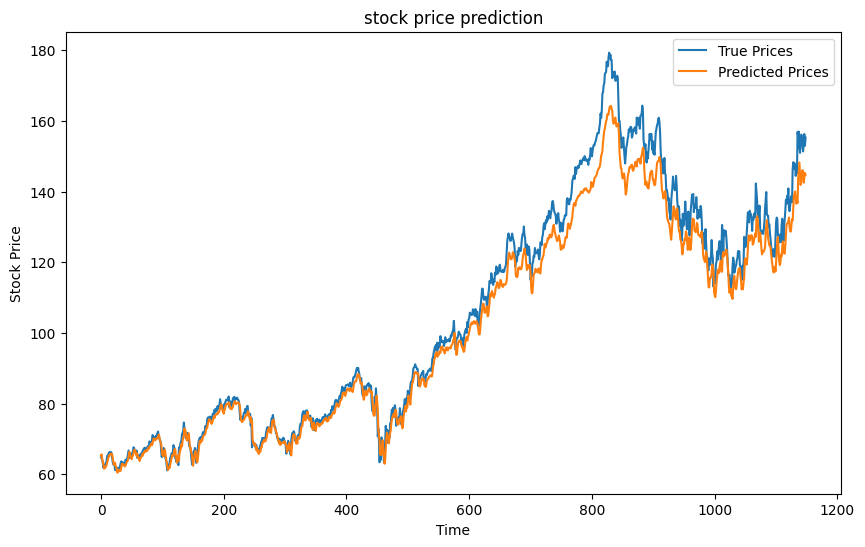

In [134]:
# plot the prediction
import matplotlib.pyplot as plt
title = "stock price prediction"
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label="True Prices")
plt.plot(y_pred_actual, label="Predicted Prices")
plt.title(title)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

# LSTM Model

In [135]:
# implement LSTM
from tensorflow.keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=input_shape))
lstm_model.add(LSTM(units=50, activation='tanh'))
lstm_model.add(Dense(units=1))  
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/home/kubuntu/Desktop/repos/fundamental_ml/fundamental_ml_assignment3/env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [136]:
print("train LSTM model...")
lstm_history = lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

train LSTM model...
Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.0047 - val_loss: 8.4263e-04
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0191e-04 - val_loss: 0.0019
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.5200e-04 - val_loss: 0.0026
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4787e-04 - val_loss: 0.0016
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.0274e-04 - val_loss: 0.0020
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.3694e-04 - val_loss: 0.0027
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.1497e-04 - val_loss: 4.0880e-04
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.3717e-04 - val_loss: 9.3365e-04
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.0043e-04 - val_loss: 8.6830e-04
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.4542e-04 - val_loss: 7.5642e-04
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step

In [137]:
print("evaluate LSTM model")
lstm_loss = model.evaluate(X_test, y_test)
print(f"LSTM test loss : {lstm_loss}")

evaluate LSTM model
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6916e-04
LSTM test loss : 0.001031255116686225


In [138]:
#lstm prediction
y_pred_lstm = lstm_model.predict(X_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [139]:
#lstm intepretion from result using normalization
lstm_y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
lstm_y_pred_actual = scaler.inverse_transform(y_pred_lstm)
print(f"lstm_y_test_actual : {lstm_y_test_actual}")
print(f"lstm_y_pred_actual : {lstm_y_pred_actual}")

lstm_y_test_actual : [[ 64.83999634]
 [ 64.52999878]
 [ 64.12000275]
 ...
 [156.27999878]
 [152.94999695]
 [155.24000549]]
lstm_y_pred_actual : [[ 63.99374 ]
 [ 64.12054 ]
 [ 63.612087]
 ...
 [146.04758 ]
 [149.09363 ]
 [146.38196 ]]


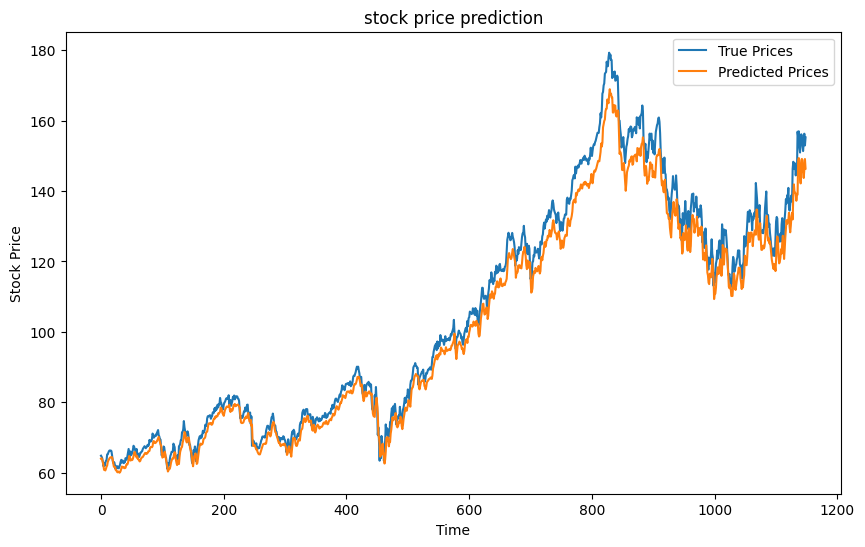

In [140]:
# plot prediction using LSTM
plt.figure(figsize=(10, 6))
plt.plot(lstm_y_test_actual, label="True Prices")
plt.plot(lstm_y_pred_actual, label="Predicted Prices")
plt.title(title)
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()

In [141]:
# implement GRU
from tensorflow.keras.layers import GRU
model_GRU = Sequential()
model_GRU.add(GRU(units=50, activation='tanh', return_sequences=True, input_shape=input_shape))
model_GRU.add(GRU(units=50, activation='tanh'))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/home/kubuntu/Desktop/repos/fundamental_ml/fundamental_ml_assignment3/env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [142]:
# preprocessign data 
X_train, X_test, y_train, y_test, scaler = preprocessing(file_path, sequence_length)

data
         Date        Low       Open    Volume       High      Close  \
0  18-11-1999  28.612303  32.546494  62546380  35.765381  31.473534   
1  19-11-1999  28.478184  30.713518  15234146  30.758226  28.880545   
2  22-11-1999  28.657009  29.551144   6577870  31.473534  31.473534   
3  23-11-1999  28.612303  30.400572   5975611  31.205294  28.612303   
4  24-11-1999  28.612303  28.701717   4843231  29.998213  29.372318   

   Adjusted Close  
0       27.066582  
1       24.836662  
2       27.066582  
3       24.605980  
4       25.259573  
training data shape (4595, 60, 1)
testing data shape (1149, 60, 1)


/tmp/ipykernel_341096/1140764659.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [143]:
# train model
history_GRU = model_GRU.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0030 - val_loss: 3.0992e-04
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 9.4354e-05 - val_loss: 2.7899e-04
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 8.0920e-05 - val_loss: 6.2208e-04
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 9.7282e-05 - val_loss: 4.2799e-04
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 8.3292e-05 - val_loss: 5.6814e-04
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.9620e-05 - val_loss: 9.2672e-04
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 7.5747e-05 - val_loss: 1.8318e-04
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 4.2260e-05 - val_loss: 0.0022
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.2948e-05 - val_loss: 2.1566e-04
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 5.4083e-05 - val_loss: 2.1981e-04
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - l

In [144]:
# calcutate loss 
print("evaluate the GRU model")
loss_GRU = model_GRU.evaluate(X_test, y_test)
print(f"GRU Loss: {loss_GRU}")

evaluate the GRU model
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4.5941e-04
GRU Loss: 0.0010201346594840288


In [145]:
#$ predition
y_pred_gru = model.predict(X_test)
y_test_actual_gru = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual_gru = scaler.inverse_transform(y_pred_gru)
print (f"y_test_actual_gru {y_test_actual_gru} ")
print (f"y_pred_actual_gru {y_pred_actual_gru} ")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
y_test_actual_gru [[ 64.83999634]
 [ 64.52999878]
 [ 64.12000275]
 ...
 [156.27999878]
 [152.94999695]
 [155.24000549]] 
y_pred_actual_gru [[ 65.3697 ]
 [ 65.66105]
 [ 64.07904]
 ...
 [143.96725]
 [145.28757]
 [144.69894]] 


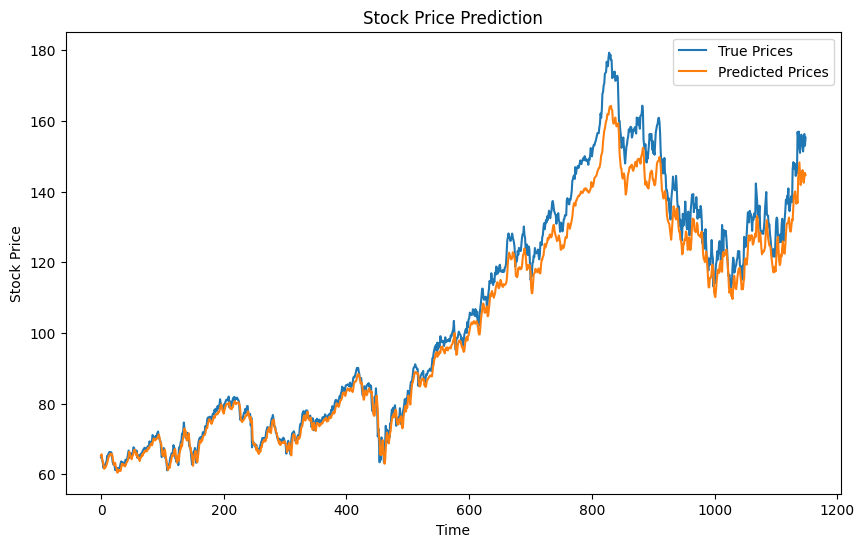

In [146]:
# plot the result of GRU
plot_predictions(y_test_actual, y_pred_actual)

In [147]:
# Stacked LSTM
model_staked_lstm = Sequential()
# first layer
model_staked_lstm.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=input_shape))
# second l;ayer 
model_staked_lstm.add(LSTM(units=50, activation='tanh', return_sequences=True))
# third layer
model_staked_lstm.add(LSTM(units=50, activation='tanh'))
model_staked_lstm.add(Dense(units=1))
model_staked_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

/home/kubuntu/Desktop/repos/fundamental_ml/fundamental_ml_assignment3/env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [148]:
#train model 
history_stacked_lstm = model_staked_lstm.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 2/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.5570e-04 - val_loss: 0.0014
Epoch 3/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.1236e-04 - val_loss: 0.0021
Epoch 4/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.5557e-04 - val_loss: 0.0011
Epoch 5/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.6769e-04 - val_loss: 0.0012
Epoch 6/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.5318e-04 - val_loss: 0.0024
Epoch 7/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.7853e-04 - val_loss: 0.0023
Epoch 8/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.5922e-04 - val_loss: 0.0014
Epoch 9/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.3876e-04 - val_loss: 8.0973e-04
Epoch 10/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.1628e-04 - val_loss: 7.2209e-04
Epoch 11/20
144/144 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 1.6187e-04 - val_loss: 

In [149]:
# evaluate loss
loss_stacked_lstm = model.evaluate(X_test, y_test)
print(f"losst : {loss_stacked_lstm}")

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6916e-04
losst : 0.001031255116686225


In [150]:
# make prediction
y_pred_stacked_lstm = model_staked_lstm.predict(X_test)


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


In [151]:
#interpretation the result 
y_test_actual_stacked_lstm = scaler.inverse_transform(y_test.reshape(-1, 1))
y_pred_actual_stacked_lstm  = scaler.inverse_transform(y_pred_stacked_lstm)
print(f"y_test_actual_stacked_lstm: {y_test_actual_stacked_lstm}")
print(f"y_pred_actual_stacked_lstm: {y_pred_actual_stacked_lstm}")

y_test_actual_stacked_lstm: [[ 64.83999634]
 [ 64.52999878]
 [ 64.12000275]
 ...
 [156.27999878]
 [152.94999695]
 [155.24000549]]
y_pred_actual_stacked_lstm: [[ 64.939445]
 [ 65.108665]
 [ 64.54584 ]
 ...
 [147.662   ]
 [150.85014 ]
 [146.26137 ]]


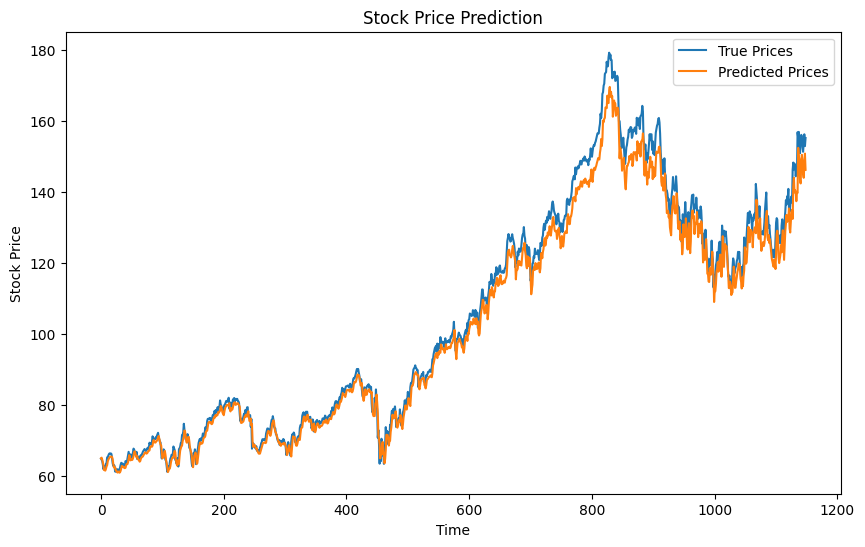

In [152]:
#plot the result
plot_predictions(y_test_actual_stacked_lstm, y_pred_actual_stacked_lstm)